## Lab 11: Modeling and Estimation
### Sunday November 17 at 11:59 PM

In this lab you will work with the tips dataset in order to:

1. Implement a basic model, define loss functions
1. Minimize loss functions using numeric libraries 

**This assignment should be completed and submitted before .**


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of this notebook.

## Setup

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [4]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
<br></br>

# Question 1: Defining the Model 

In lecture we modeled the percent tip.  In this lab we will instead attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = \theta^*  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $\theta^*$ represents the true percent tip that we would like to estimate.  


In [5]:
def model(theta, total_bill):
    """
    Takes the parameter theta and the total bill, and returns the computed tip.
    
    Parameters
    ----------
    theta: tip percentage 
    total_bill: total bill value in dollars
    """
    return theta*total_bill
    # YOUR CODE HERE
    raise NotImplementedError()

In [6]:
assert model(1.0, 2.0) == 2.0
assert np.all(model(3.0, np.array([4.0, 5.0])) == 3.0 * np.array([4.0, 5.0]))

---
<br/><br/><br/>

# Loss Functions

In class we covered a range of different loss functions.  In this lab we will implement the squared loss and the absolute loss functions.  
Suppose for a given total bill $x$, we observe a tip value of $y$ and our model predicts a tip value $\hat{y}$ by:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

---
<br></br>
In this question, you are going to define functions for **squared loss** and **absolute loss**. 

## Question 2a: Implement the squared loss function


$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

In [7]:
def squared_loss(y_obs, y_hat):
    """
    Calculate the squared loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the squared loss for each prediction
    """
    return (y_obs - y_hat)**2
    # YOUR CODE HERE
    raise NotImplementedError()
    
    

In [8]:
assert squared_loss(2, 1) == 1
assert squared_loss(2, 0) == 4 

## Question 2b: Plotting Squared Loss

Suppose you observe a bill of $\$28$ with a tip $\$3$. (Does this tip look reasonable?)

Transform this information in our model, we have a $y=3.00$ and $x=28.00$. Now suppose we pick an initial range of $\theta$'s (tip percent in this case) for you. Use the `model` and `squared_loss` function defined above to plot the loss for a range of $\theta$ values:

In [9]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) # A range of theta values

In [12]:
## Finish this by replacing 0.0 with the correct calculation 
## Hint: You will use squared_loss y, model, theta and x
#loss should be a numpy array where the ith entry corresponds to the loss for the ith theta
loss = np.array([ 0.0 for theta in thetas])

# YOUR CODE HERE
loss = np.array([squared_loss(y,model(theta,x)).mean() for theta in thetas])
raise NotImplementedError()

NotImplementedError: 

In [13]:
assert loss.dtype == np.dtype('float64') 

To test your loss calculation above, run the cell below, and it should produce this picture:

![squared loss](squared_loss.png)

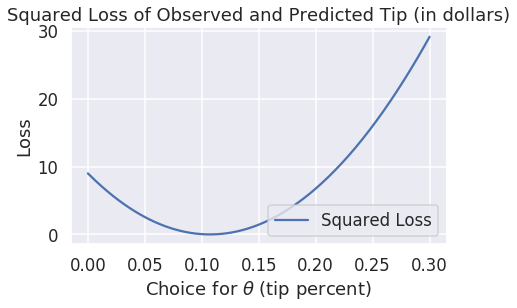

In [14]:
plt.plot(thetas, loss, label="Squared Loss")
plt.title("Squared Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c: Implement the absolute loss 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

In [15]:
def abs_loss(y_obs, y_hat):
    """
    Calculate the absolute loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the absolute loss for each prediction
    """
    return np.abs(y_obs - y_hat)
    # YOUR CODE HERE
    raise NotImplementedError()

In [16]:
assert abs_loss(2, 1) == 1
assert abs_loss(-2, 1) == 3

In [17]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) 

## Finish this by replacing 0.0 with the correct calculation 
## Hint: You will use abs_loss y, model, theta and x
#loss should be a numpy array where the ith entry corresponds to the loss for the ith theta
loss = np.array([abs_loss(y,model(theta,x)).mean() for theta in thetas])

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [18]:
assert np.issubdtype(loss.dtype, np.dtype(float).type) 

Run the code in the following cell. You should obtain a plot of the absolute loss like below.  
![absolute loss](absolute_loss.png)


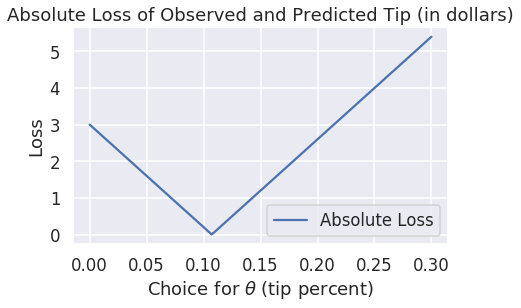

In [19]:
plt.plot(thetas, loss, label="Absolute Loss")
plt.title("Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


## Question 2d: Plotting **Average Loss** for our Data
Remember we define our model to be:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\Large
L\left(\theta, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\theta(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n L(\theta x_i, y_i) = \frac{1}{n} \sum_{i=1}^n L(\hat{y_i}, y_i)
$$

where $m_\theta(x_i) = \theta x_i = \hat{y_i}$ is the model evaluated using the parameters $\theta$ on the bill amount $x_i$.

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\theta$**

In [22]:
thetas = np.linspace(0, 0.3, 200) # A range of theta values
y = data['tip']
x = data['total_bill']

# Replace 0.0 with the correct value computed 
# Use the model and loss functions from above

# This time, each loss array should be a numpy array where the ith entry corresponds to the 
# average loss across all data points for the ith theta

avg_squared_loss = np.array([squared_loss(model(theta,x),y).mean() for theta in thetas])
avg_absolute_loss = np.array([abs_loss(model(theta,x),y).mean() for theta in thetas])

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

To test your loss calculations, run the cell below. If your code was correct, the following plot should look like:

![Average Loss](average_loss.png)

Note: Your colors might be different.

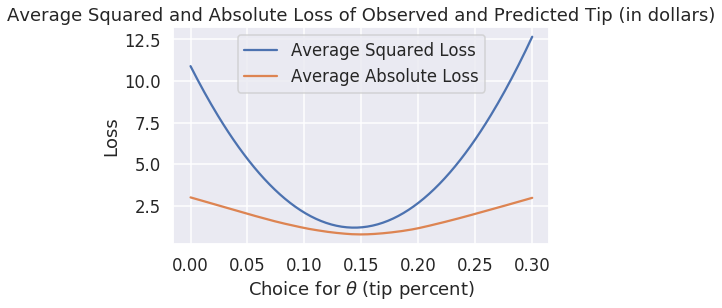

In [23]:
plt.plot(thetas, avg_squared_loss, label = "Average Squared Loss")
plt.plot(thetas, avg_absolute_loss, label = "Average Absolute Loss")
plt.title("Average Squared and Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

**Based on the plot above, approximately what is the optimal value of theta you would choose for this model?**

The optimal value of theta would be around .15 (tip percent)

## 3. Gradient Descent for Squared Loss

Let's try gradient descent: an algorithm for guess-and-check to iteratively find an approximate solution. 

3a. Write a function `dt` that computes the gradient of the average square loss with respect to $\theta$. 

In [27]:
def dt(x, y, theta):
    # YOUR CODE HERE
    return np.gradient(squared_loss(y,model(theta,x)).mean())
    raise NotImplementedError()

3b. Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in an array for $\textbf{x}$ (`x`), an array for $\textbf{y}$ (`y`), and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times
- Recall that the gradient descent update function follows the form:
$$\large
\boldsymbol\theta^{(t+1)} \leftarrow \boldsymbol\theta^{(t)} - \alpha \left(\nabla_\boldsymbol\theta \mathbf{L}(\textbf{x}, \textbf{y}, \boldsymbol\theta^{(t)}) \right)
$$

In [31]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.001):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    """
    
    # YOUR CODE HERE
    for i in range(num_iter):
        d_t = dt(x,y,theta)
        theta = theta = alpha*d_t
    raise NotImplementedError()
    return theta

3c. Compute the parameter $\hat{\theta}$ that minmizes the average square loss. Try using 

 - initial initial guess $0$
 - 20 iterations 
 - learning rate 0.001

In [32]:
def init_theta():
    return 0
a = init_theta()
y = data['tip']
x = data['total_bill']

theta_hat = dt(x,y,a)

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

3d. Repeat 3a, 3b, 3c for absolute loss.  Compute the parameter $\hat{\theta}$ that minmizes the average absolute loss. How does your answer compare to average square loss?

In [ ]:
def dt(x, y, theta):
    # YOUR CODE HERE
    np.gradient(abs_loss(y,model(theta,x)).mean())
    raise NotImplementedError()

In [30]:
def init_theta():
    return 0

y = data['tip']
x = data['total_bill']
a = init_theta()
theta_hat = dt(x,y,a)

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 